In [110]:
import numpy as np
import pandas as pd
import time
import csv

In [428]:
posts = pd.read_csv('reddit.csv', encoding = "ISO-8859-1", header = None)

In [429]:
posts.columns = ['CityName','State','Pop2017','Pop2010','Text','NumComments','Votes','Domain','DateTime']

In [16]:
print(posts[:10])

   CityName State   Pop2017   Pop2010  \
0  New York    NY  20320876  19567410   
1  New York    NY  20320876  19567410   
2  New York    NY  20320876  19567410   
3  New York    NY  20320876  19567410   
4  New York    NY  20320876  19567410   
5  New York    NY  20320876  19567410   
6  New York    NY  20320876  19567410   
7  New York    NY  20320876  19567410   
8  New York    NY  20320876  19567410   
9  New York    NY  20320876  19567410   

                                                Text  NumComments  Votes  \
0   PLEASE UPVOTE: Trying to locate a missing person          310  25178   
1  New York's vanishing shops and storefronts: 'I...         1296  11507   
2  Ivanka and Donald Trump Jr. Were Close to Bein...          412  10938   
3  LOST DOG! (BROOKLYN AREA) - Cable guys left do...          266   9844   
4  As Redditors Predicted: New York Post Takes Cr...          349   7361   
5                        The Onion's 9/11 Front Page          544   7037   
6          Escal

In [12]:
postsny = posts[posts.CityName == 'New York']

In [13]:
len(posts)

87192

In [14]:
len(postsny)

992

In [15]:
postsny[:10]

,CityName,State,Pop2017,Pop2010,Text,NumComments,Votes,Domain,DateTime
0,New York,NY,20320876,19567410,PLEASE UPVOTE: Trying to locate a missing person,310,25178,self.nyc,2018-01-13T22:40:08+00:00
1,New York,NY,20320876,19567410,New York's vanishing shops and storefronts: 'I...,1296,11507,theguardian.com,2017-12-24T13:58:39+00:00
2,New York,NY,20320876,19567410,Ivanka and Donald Trump Jr. Were Close to Bein...,412,10938,propublica.org,2017-10-04T11:38:36+00:00
3,New York,NY,20320876,19567410,LOST DOG! (BROOKLYN AREA) - Cable guys left do...,266,9844,i.imgur.com,2014-12-17T17:01:47+00:00
4,New York,NY,20320876,19567410,As Redditors Predicted: New York Post Takes Cr...,349,7361,self.nyc,2016-05-14T21:45:31+00:00
5,New York,NY,20320876,19567410,The Onion's 9/11 Front Page,544,7037,i.imgur.com,2016-09-09T20:44:50+00:00
6,New York,NY,20320876,19567410,Escalator etiquette at 530AM Hudson Yards,490,5992,i.imgur.com,2017-10-16T10:05:33+00:00
7,New York,NY,20320876,19567410,Saw this and I just had to post it here,268,5694,i.redd.it,2017-12-12T02:48:09+00:00
8,New York,NY,20320876,19567410,Support petition for NYC taxpayers to stop pay...,344,5633,change.org,2017-01-28T14:45:03+00:00
9,New York,NY,20320876,19567410,Date while you wait @ W 4th Station,184,5453,imgur.com,2015-06-24T00:01:00+00:00


In [18]:
posts.groupby('CityName').mean()

,Pop2017,Pop2010,NumComments,Votes
CityName,,,,
Akron,703505.0,703200.0,10.031219,22.957704
Albany,886188.0,870716.0,16.441206,49.943719
Albuquerque,910726.0,887077.0,18.825735,88.096251
Allentown,840550.0,821173.0,2.086420,3.049383
Atlanta,5884736.0,5286728.0,105.352701,980.754332
Augusta,600151.0,564873.0,8.974773,13.276488
Austin,2115827.0,1716289.0,117.469098,625.840932
Bakersfield,893119.0,839631.0,13.085106,25.052685
Baltimore,2808175.0,2710489.0,56.433031,206.119839


In [430]:
posts['DateTime'] = pd.to_datetime(posts['DateTime'])
posts = posts.set_index('DateTime')

In [22]:
posts.head()

,CityName,State,Pop2017,Pop2010,Text,NumComments,Votes,Domain
DateTime,,,,,,,,
2018-01-13 22:40:08,New York,NY,20320876,19567410,PLEASE UPVOTE: Trying to locate a missing person,310,25178,self.nyc
2017-12-24 13:58:39,New York,NY,20320876,19567410,New York's vanishing shops and storefronts: 'I...,1296,11507,theguardian.com
2017-10-04 11:38:36,New York,NY,20320876,19567410,Ivanka and Donald Trump Jr. Were Close to Bein...,412,10938,propublica.org
2014-12-17 17:01:47,New York,NY,20320876,19567410,LOST DOG! (BROOKLYN AREA) - Cable guys left do...,266,9844,i.imgur.com
2016-05-14 21:45:31,New York,NY,20320876,19567410,As Redditors Predicted: New York Post Takes Cr...,349,7361,self.nyc


In [23]:
%matplotlib inline

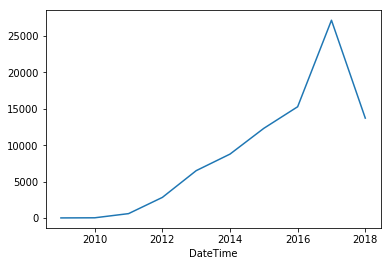

In [32]:
posts.groupby(posts.index.year).size().plot()

In [40]:
posts[posts.index.year == 2010]

,CityName,State,Pop2017,Pop2010,Text,NumComments,Votes,Domain
DateTime,,,,,,,,
2010-11-06 16:56:58,Hartford,CT,1210259,1212381,"Teengirl Fantasy comes to Hartford, CT",0,3,hartfordpartystarters.org
2010-10-09 18:39:37,Hartford,CT,1210259,1212381,Hartford Baking Co.,0,2,self.Hartford
2010-08-11 23:04:45,Hartford,CT,1210259,1212381,Perseid Meteor Watch - I really want to see th...,1,2,findlocal.courant.com
2010-11-10 14:30:33,New Haven,CT,860435,862477,New Haven announces program to pay college tui...,4,11,nhregister.com
2010-11-17 21:18:55,New Haven,CT,860435,862477,"Stephen Colbert covers the ""deli shooting"" in ...",1,9,colbertnation.com
2010-10-05 12:23:26,New Haven,CT,860435,862477,"""This is America. Anyone can film anytime they...",2,9,newhavenindependent.org
2010-12-16 21:10:33,New Haven,CT,860435,862477,New Haven racial map,0,8,projects.nytimes.com
2010-11-01 03:58:22,New Haven,CT,860435,862477,You can still register to vote in Connecticut ...,0,7,sots.ct.gov
2010-10-03 14:58:51,New Haven,CT,860435,862477,"""You don't take pictures of us."" Video shows N...",0,9,pixiq.com


In [41]:
poststop = posts[posts.Votes >= 10]

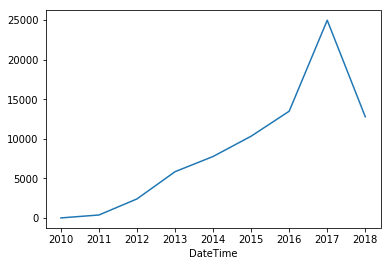

In [42]:
poststop.groupby(poststop.index.year).size().plot()

In [44]:
poststop[poststop.index.year == 2011]

,CityName,State,Pop2017,Pop2010,Text,NumComments,Votes,Domain
DateTime,,,,,,,,
2011-12-05 17:57:54,New York,NY,20320876,19567410,An investment banker's cover letter for a seco...,1903,1582,self.nyc
2011-08-23 17:54:08,New York,NY,20320876,19567410,EARTHQUAKE!,774,701,self.nyc
2011-09-28 19:04:12,New York,NY,20320876,19567410,Denied publicly on the train. Just had to vent.,228,671,self.nyc
2011-12-13 04:15:52,New York,NY,20320876,19567410,I took this photo flying into JFK this evening...,101,658,imgur.com
2011-11-08 12:48:04,Chicago,IL,9533040,9461105,Mr. Mayor looks to be as excited to be on the ...,197,833,i.imgur.com
2011-11-15 14:47:16,Chicago,IL,9533040,9461105,Chicago,43,645,i.imgur.com
2011-11-16 05:24:12,Chicago,IL,9533040,9461105,"Congratulations, /r/Chicago! You're the Subred...",89,641,reddit.com
2011-09-13 01:17:18,Dallas,TX,7399662,6426214,Just visited Dallas for the first time.,59,227,i.imgur.com
2011-08-29 18:36:28,Dallas,TX,7399662,6426214,Tried In-And-Out Burger for the first time las...,129,202,i.imgur.com


In [431]:
posts = posts[posts.index > "6/29/2014"]
posts = posts[posts.Votes >= 10]
posts = posts.drop(posts[posts['Text'].isnull()].index)

In [432]:
len(posts)

65485

In [114]:
postsnew = posts[posts.CityName == 'Chicago']
postsnew.groupby(postsnew.index.year).mean()

,Pop2017,Pop2010,NumComments,Votes
DateTime,,,,
2014,9533040.0,9461105.0,112.709091,994.654545
2015,9533040.0,9461105.0,131.253731,1068.253731
2016,9533040.0,9461105.0,113.297468,1042.291139
2017,9533040.0,9461105.0,121.483660,1029.084967
2018,9533040.0,9461105.0,121.382353,1049.352941


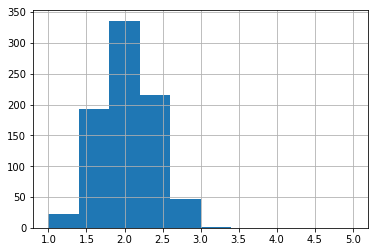

In [70]:
np.log10(poststop[poststop.CityName=='New York']['Votes']).hist(range=(1,5))

In [92]:
import nltk

In [93]:
from nltk.tokenize import word_tokenize

In [119]:
postsnew.head()

,CityName,State,Pop2017,Pop2010,Text,NumComments,Votes,Domain,Tokens
DateTime,,,,,,,,,
2015-10-08 03:52:53,Chicago,IL,9533040,9461105,There is a heroin epidemic in the Northwest Su...,818,8991,i.imgur.com,"[There, is, a, heroin, epidemic, in, the, Nort..."
2017-02-23 00:57:06,Chicago,IL,9533040,9461105,I'm putting a $300 dollar bounty on Portillo's...,1154,6235,self.chicago,"[I, 'm, putting, a, $, 300, dollar, bounty, on..."
2016-05-09 02:29:28,Chicago,IL,9533040,9461105,After 8 hours in 4 sittings at the Art Institu...,202,5339,imgur.com,"[After, 8, hours, in, 4, sittings, at, the, Ar..."
2016-03-08 14:54:29,Chicago,IL,9533040,9461105,The Trump Billboard didn't make it,407,4847,imgur.com,"[The, Trump, Billboard, did, n't, make, it]"
2016-05-25 01:28:25,Chicago,IL,9533040,9461105,Posted this in /r/painting and was told you al...,92,3973,i.imgur.com,"[Posted, this, in, /r/painting, and, was, told..."


In [118]:
postsnew[['Tokens']].head()

,Tokens
DateTime,
2015-10-08 03:52:53,"[There, is, a, heroin, epidemic, in, the, Nort..."
2017-02-23 00:57:06,"[I, 'm, putting, a, $, 300, dollar, bounty, on..."
2016-05-09 02:29:28,"[After, 8, hours, in, 4, sittings, at, the, Ar..."
2016-03-08 14:54:29,"[The, Trump, Billboard, did, n't, make, it]"
2016-05-25 01:28:25,"[Posted, this, in, /r/painting, and, was, told..."


In [122]:
posts.loc[:,'Tokens'] = pd.Series([word_tokenize(i) for i in posts['Text']], index = posts.index)

TypeError: expected string or bytes-like object

In [123]:
len(posts)

65486

In [433]:
posts = posts.drop(posts[posts['Text'].isnull()].index)

In [159]:
len(posts)

65485

In [160]:
posts[posts['Text'].isnull()]

,CityName,State,Pop2017,Pop2010,Text,NumComments,Votes,Domain
DateTime,,,,,,,,


In [165]:
import textblob
from textblob import TextBlob

In [176]:
tb = TextBlob(posts['Text'][0])
tb

TextBlob("PLEASE UPVOTE: Trying to locate a missing person")

In [168]:
tb.sentiment

Sentiment(polarity=-0.2, subjectivity=0.05)

In [437]:
posts['TextBlob'] = pd.Series([TextBlob(i) for i in posts['Text']], index = posts.index)

In [439]:
posts['Sentiment'] = pd.Series([i.sentiment for i in posts['TextBlob']], index = posts.index)

In [440]:
posts['Polarity'] = pd.Series([i.polarity for i in posts['Sentiment']], index = posts.index)

In [441]:
posts['Subjectivity'] = pd.Series([i.subjectivity for i in posts['Sentiment']], index = posts.index)

In [442]:
posts.head()

,CityName,State,Pop2017,Pop2010,Text,NumComments,Votes,Domain,TextBlob,Sentiment,Polarity,Subjectivity
DateTime,,,,,,,,,,,,
2018-01-13 22:40:08,New York,NY,20320876,19567410,PLEASE UPVOTE: Trying to locate a missing person,310,25178,self.nyc,"(P, L, E, A, S, E, , U, P, V, O, T, E, :, , ...","(-0.2, 0.05)",-0.200000,0.050000
2017-12-24 13:58:39,New York,NY,20320876,19567410,New York's vanishing shops and storefronts: 'I...,1296,11507,theguardian.com,"(N, e, w, , Y, o, r, k, ', s, , v, a, n, i, ...","(0.13636363636363635, 0.45454545454545453)",0.136364,0.454545
2017-10-04 11:38:36,New York,NY,20320876,19567410,Ivanka and Donald Trump Jr. Were Close to Bein...,412,10938,propublica.org,"(I, v, a, n, k, a, , a, n, d, , D, o, n, a, ...","(0.5, 0.5)",0.500000,0.500000
2014-12-17 17:01:47,New York,NY,20320876,19567410,LOST DOG! (BROOKLYN AREA) - Cable guys left do...,266,9844,i.imgur.com,"(L, O, S, T, , D, O, G, !, , (, B, R, O, O, ...","(0.0, 0.25)",0.000000,0.250000
2016-05-14 21:45:31,New York,NY,20320876,19567410,As Redditors Predicted: New York Post Takes Cr...,349,7361,self.nyc,"(A, s, , R, e, d, d, i, t, o, r, s, , P, r, ...","(0.13636363636363635, 0.45454545454545453)",0.136364,0.454545


In [216]:
posts.groupby('CityName',year).count()

NameError: name 'year' is not defined

In [200]:
postscity.sort_values(by='Polarity')
postscity[postscity.State >= 10].index

Index(['Akron', 'Albany', 'Albuquerque', 'Atlanta', 'Augusta', 'Austin',
       'Bakersfield', 'Baltimore', 'Baton Rouge', 'Birmingham', 'Boise City',
       'Boston', 'Buffalo', 'Charleston', 'Charlotte', 'Chattanooga',
       'Chicago', 'Cincinnati', 'Cleveland', 'Colorado Springs', 'Columbia',
       'Columbus', 'Dallas', 'Dayton', 'Denver', 'Des Moines', 'Detroit',
       'Durham', 'El Paso', 'Fresno', 'Grand Rapids', 'Greensboro',
       'Greenville', 'Harrisburg', 'Hartford', 'Houston', 'Indianapolis',
       'Jackson', 'Jacksonville', 'Kansas City', 'Knoxville', 'Lakeland',
       'Las Vegas', 'Little Rock', 'Los Angeles', 'Louisville', 'Madison',
       'Memphis', 'Miami', 'Milwaukee', 'Minneapolis', 'Nashville',
       'New Haven', 'New Orleans', 'New York', 'North Port', 'Ogden', 'Omaha',
       'Orlando', 'Philadelphia', 'Phoenix', 'Pittsburgh', 'Portland',
       'Providence', 'Provo', 'Raleigh', 'Richmond', 'Riverside', 'Rochester',
       'Sacramento', 'Salt Lake City', '

In [206]:
posts[posts.CityName in postscity[postscity.State >= 10].index]

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [213]:
'Akron' in postscity[postscity.State >= 10].index

True

In [225]:
pd.to_datetime("May 16, 2016, 7:34 AM")

Timestamp('2016-05-16 07:34:00')

In [231]:
posts.groupby(['CityName',posts.index.year]).filter(lambda x: len(x)>10)

,CityName,State,Pop2017,Pop2010,Text,NumComments,Votes,Domain,TextBlob,Sentiment,Polarity,Subjectivity
DateTime,,,,,,,,,,,,
2018-01-13 22:40:08,New York,NY,20320876,19567410,PLEASE UPVOTE: Trying to locate a missing person,310,25178,self.nyc,"(P, L, E, A, S, E, , U, P, V, O, T, E, :, , ...","(-0.2, 0.05)",-0.200000,0.050000
2017-12-24 13:58:39,New York,NY,20320876,19567410,New York's vanishing shops and storefronts: 'I...,1296,11507,theguardian.com,"(N, e, w, , Y, o, r, k, ', s, , v, a, n, i, ...","(0.13636363636363635, 0.45454545454545453)",0.136364,0.454545
2017-10-04 11:38:36,New York,NY,20320876,19567410,Ivanka and Donald Trump Jr. Were Close to Bein...,412,10938,propublica.org,"(I, v, a, n, k, a, , a, n, d, , D, o, n, a, ...","(0.5, 0.5)",0.500000,0.500000
2014-12-17 17:01:47,New York,NY,20320876,19567410,LOST DOG! (BROOKLYN AREA) - Cable guys left do...,266,9844,i.imgur.com,"(L, O, S, T, , D, O, G, !, , (, B, R, O, O, ...","(0.0, 0.25)",0.000000,0.250000
2016-05-14 21:45:31,New York,NY,20320876,19567410,As Redditors Predicted: New York Post Takes Cr...,349,7361,self.nyc,"(A, s, , R, e, d, d, i, t, o, r, s, , P, r, ...","(0.13636363636363635, 0.45454545454545453)",0.136364,0.454545
2016-09-09 20:44:50,New York,NY,20320876,19567410,The Onion's 9/11 Front Page,544,7037,i.imgur.com,"(T, h, e, , O, n, i, o, n, ', s, , 9, /, 1, ...","(0.0, 0.0)",0.000000,0.000000
2017-10-16 10:05:33,New York,NY,20320876,19567410,Escalator etiquette at 530AM Hudson Yards,490,5992,i.imgur.com,"(E, s, c, a, l, a, t, o, r, , e, t, i, q, u, ...","(0.0, 0.0)",0.000000,0.000000
2017-12-12 02:48:09,New York,NY,20320876,19567410,Saw this and I just had to post it here,268,5694,i.redd.it,"(S, a, w, , t, h, i, s, , a, n, d, , I, , ...","(0.0, 0.0)",0.000000,0.000000
2017-01-28 14:45:03,New York,NY,20320876,19567410,Support petition for NYC taxpayers to stop pay...,344,5633,change.org,"(S, u, p, p, o, r, t, , p, e, t, i, t, i, o, ...","(0.13636363636363635, 0.5)",0.136364,0.500000


In [248]:
postspol = posts.groupby([pd.Grouper(freq='M'),'CityName']).mean()

In [244]:
import matplotlib.pyplot as plt

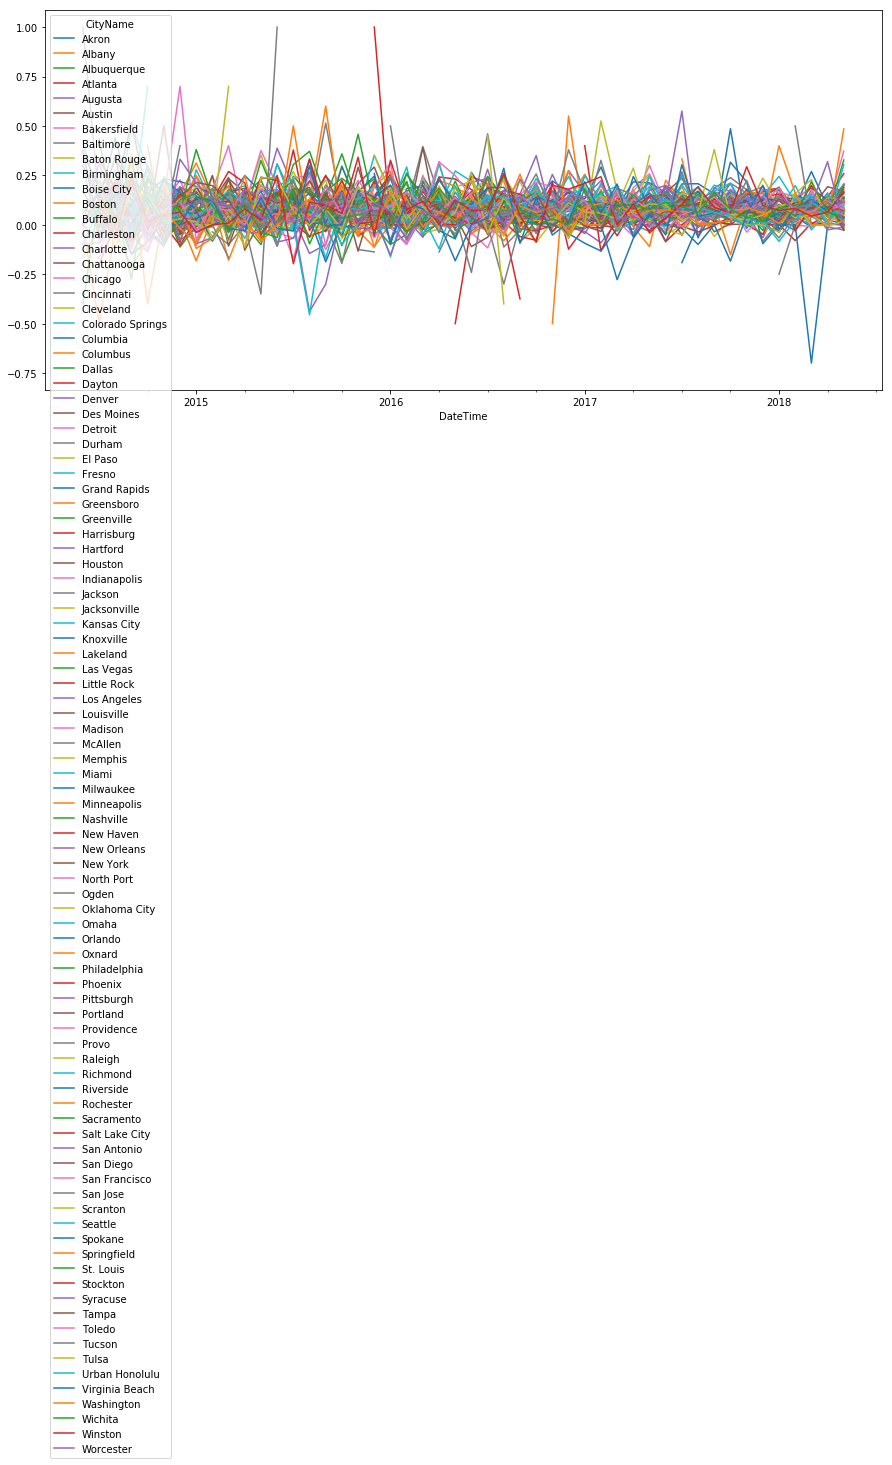

In [249]:
fig, ax = plt.subplots(figsize=(15,7))
postspol['Polarity'].unstack().plot(ax=ax)

In [250]:
postspol.head()

Pop2017    Pop2010  NumComments  Votes  Polarity  \
DateTime   CityName                                                          
2014-06-30 Akron         703505.0   703200.0         11.0   16.5       0.0   
           Albuquerque   910726.0   887077.0          0.0   55.0       0.0   
           Austin       2115827.0  1716289.0         18.0  484.0       0.1   
           Bakersfield   893119.0   839631.0          5.0   21.0       0.0   
           Baltimore    2808175.0  2710489.0         19.0  148.0       0.0   

                        Subjectivity  
DateTime   CityName                   
2014-06-30 Akron                0.05  
           Albuquerque          0.00  
           Austin               0.30  
           Bakersfield          0.00  
           Baltimore            0.00

In [253]:
postspol['PopChange'] = (postspol['Pop2017'] - postspol['Pop2010']) / postspol['Pop2010']

In [254]:
postspol.head()

Pop2017    Pop2010  NumComments  Votes  Polarity  \
DateTime   CityName                                                          
2014-06-30 Akron         703505.0   703200.0         11.0   16.5       0.0   
           Albuquerque   910726.0   887077.0          0.0   55.0       0.0   
           Austin       2115827.0  1716289.0         18.0  484.0       0.1   
           Bakersfield   893119.0   839631.0          5.0   21.0       0.0   
           Baltimore    2808175.0  2710489.0         19.0  148.0       0.0   

                        Subjectivity  PopChange  
DateTime   CityName                              
2014-06-30 Akron                0.05   0.000434  
           Albuquerque          0.00   0.026659  
           Austin               0.30   0.232792  
           Bakersfield          0.00   0.063704  
           Baltimore            0.00   0.036040

In [295]:
postspol.index[0][0].date()

datetime.date(2014, 6, 30)

In [306]:
postspol = postspol.reset_index()

In [318]:
postspol['Date'] = postspol['DateTime'].dt.date

In [325]:
graph1 = postspol.groupby('CityName').mean()

In [382]:
graph1.sort_values(by='Subjectivity')

,Pop2017,Pop2010,NumComments,Votes,Polarity,Subjectivity,PopChange
CityName,,,,,,,
Stockton,745424.0,685306.0,1.880952,13.059524,-0.021429,0.077381,0.087724
Columbia,825033.0,767598.0,4.877104,13.239057,0.048843,0.096965,0.074824
Provo,617675.0,526810.0,4.218750,12.708333,0.015625,0.186719,0.172482
Ogden,665358.0,597159.0,4.756331,14.832023,0.047197,0.190907,0.114206
Harrisburg,571903.0,549475.0,4.617262,13.436905,0.072123,0.194454,0.040817
Louisville,1293953.0,1235708.0,35.461958,166.042661,0.052572,0.199585,0.047135
Augusta,600151.0,564873.0,8.998897,16.331623,0.058005,0.200186,0.062453
Dayton,803416.0,799232.0,16.224271,37.755641,0.067602,0.211183,0.005235
Lakeland,686483.0,602095.0,8.016488,16.040976,0.075788,0.212168,0.140157


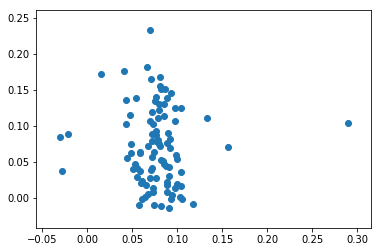

In [384]:
plt.scatter(graph1['Polarity'],graph1['PopChange'])

In [338]:
import wordcloud

In [339]:
from wordcloud import WordCloud

In [348]:
postsny.shape

(992, 9)

In [350]:
' '.join(postsny['Text'])

'PLEASE UPVOTE: Trying to locate a missing person New York\'s vanishing shops and storefronts: \'It\'s not Amazon, it\'s rent\' | Business Ivanka and Donald Trump Jr. Were Close to Being Charged With Fraud in 2012, But Manhattan DA Cy Vance Intervened After Visit from Trump Lawyer and Top Donor LOST DOG! (BROOKLYN AREA) - Cable guys left door open. Friend\'s dog escaped. Can you help? Upvote for visibility! As Redditors Predicted: New York Post Takes Credit for My Parking Ticket Findings The Onion\'s 9/11 Front Page Escalator etiquette at 530AM Hudson Yards Saw this and I just had to post it here Support petition for NYC taxpayers to stop paying $1M a day for Melania to live here Date while you wait @ W 4th Station Majority of N.Y. voters support legalizing and taxing pot: poll NYC snow is beautiful they said I did an Etch A Sketch of Times Square Whenever I take the subway On the streets of Chinatown this morning . . . 12 hours in Brooklyn NY Post crushes another cover title Yesterday

In [351]:
wc = WordCloud().generate(' '.join(postsny['Text']))

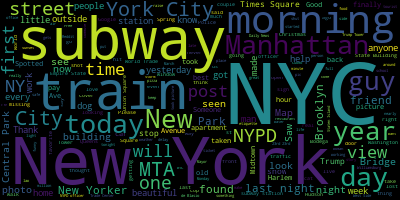

In [352]:
wc.to_image()

(-0.5, 399.5, 199.5, -0.5)

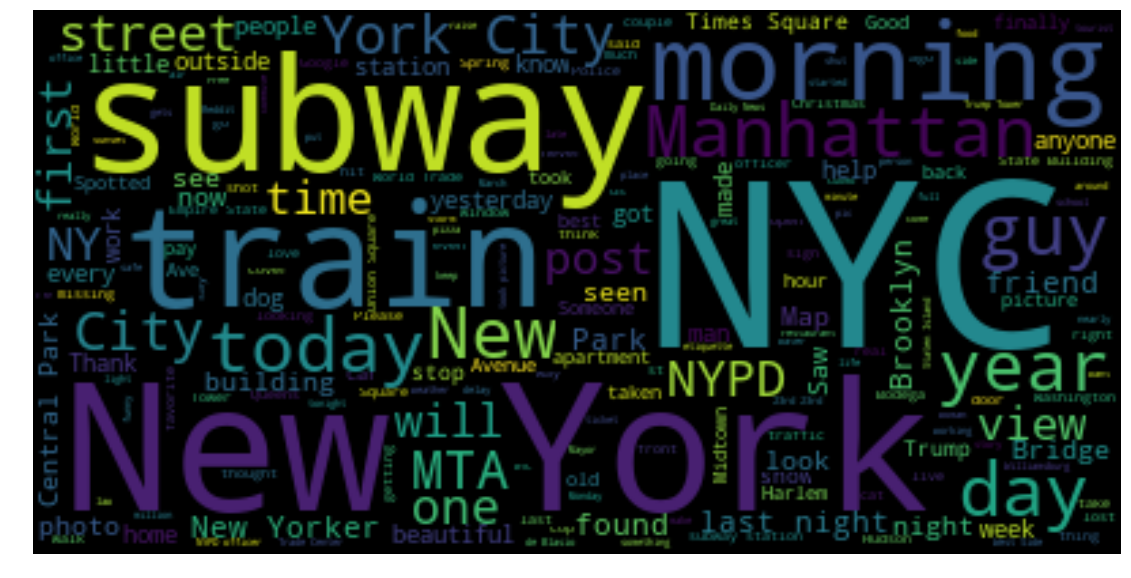

In [356]:
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

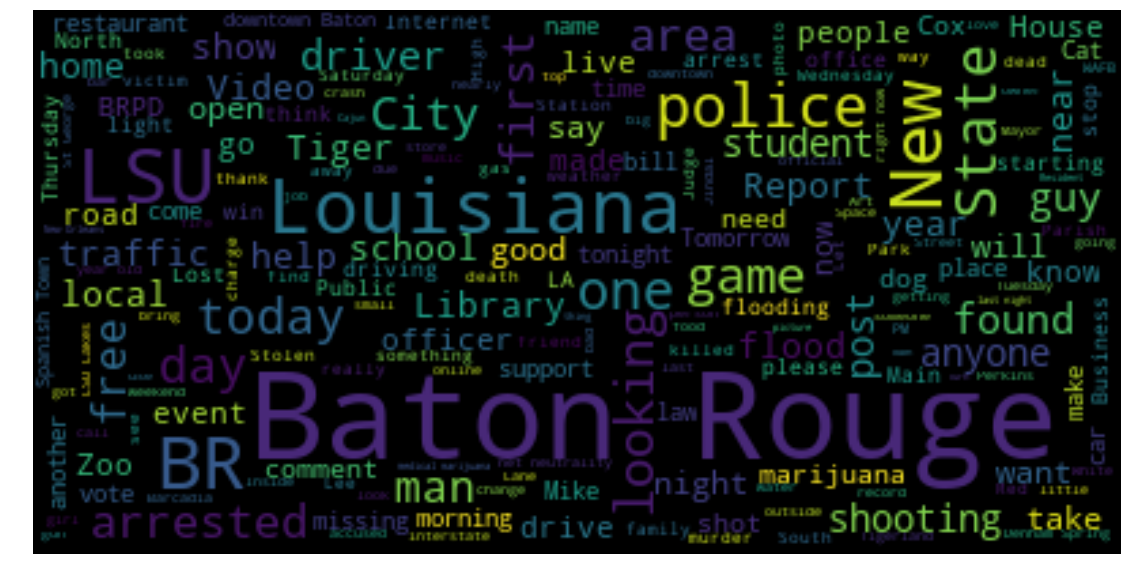

In [588]:
txt = ' '.join(posts[posts['CityName'] == 'Baton Rouge']['Text'])
wc = WordCloud().generate(txt)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [385]:
posts['Polarity'].mean()

0.07807563495420505

In [386]:
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression

In [387]:
linreg1 = LinearRegression()

In [394]:
features = graph1.columns[0:4]
X = graph1[features]
y = graph1.Polarity

In [395]:
linreg1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [396]:
list(zip(features,linreg1.coef_))

[('Pop2017', -2.0107808857911122e-08),
 ('Pop2010', 1.94838845574541e-08),
 ('NumComments', 0.00024303522195280193),
 ('Votes', -1.8942839701284487e-05)]

In [397]:
linreg1.score(X,y)

0.011425784880363608

In [398]:
linreg2 = LinearRegression()

In [399]:
y2 = graph1.Subjectivity

In [400]:
linreg2.fit(X,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [401]:
list(zip(features,linreg2.coef_))

[('Pop2017', -1.3133085409858605e-08),
 ('Pop2010', 1.4353740377353829e-08),
 ('NumComments', 0.0006186106312562617),
 ('Votes', -5.9235346914742956e-05)]

In [402]:
linreg2.score(X,y2)

0.024171082678994704

In [404]:
linreg3 = LinearRegression()
features3 = graph1.columns[0:5]
X3 = graph1[features3]
y3 = graph1.Subjectivity
linreg3.fit(X3,y3)
list(zip(features3,linreg3.coef_))

[('Pop2017', -6.103240983834656e-09),
 ('Pop2010', 7.542024679169334e-09),
 ('NumComments', 0.0005336436508933974),
 ('Votes', -5.261278465408239e-05),
 ('Polarity', 0.34960768106018136)]

In [405]:
linreg3.score(X3,y3)

0.09370281115783452

In [407]:
import re

In [409]:
s = '32.8153°N 117.1350°W'
re.search('\d+\.\d+',s)[0]

'32.8153'

In [414]:
re.findall('\d+\.\d+',s)[1]

'117.1350'

In [524]:
cities = pd.read_csv('cities.csv', encoding = "ISO-8859-1", header = None)

In [525]:
cities.columns = ['Name','Area','Density','Lat','Long','Income']

In [526]:
cities = cities.dropna(how='all')

In [527]:
cities.index = np.arange(len(cities))

In [528]:
cities['Income'].mean()

23023.164948453606

In [529]:
cities.head(50)

,Name,Area,Density,Lat,Long,Income
0,New York,780.9,10933.0,40.6635,73.9387,24581.0
1,Los Angeles,1213.9,3276.0,34.0194,118.4108,21170.0
2,Chicago,588.7,4600.0,41.8376,87.6818,22957.0
3,Houston,1651.1,1395.0,29.7866,95.3909,21701.0
4,Phoenix,1340.6,1200.0,33.5722,112.0901,21907.0
5,Philadelphia,347.6,4511.0,40.0094,75.1333,22874.0
6,San Antonio,1194.0,1250.0,29.4724,98.5251,18518.0
7,San Diego,842.3,1670.0,32.8153,117.1350,22926.0
8,Dallas,882.9,1493.0,32.7933,96.7665,23616.0
9,San Jose,459.7,2231.0,37.2967,121.8189,40392.0


In [443]:
posts[posts['CityName']=='Urban Honolulu']

,CityName,State,Pop2017,Pop2010,Text,NumComments,Votes,Domain,TextBlob,Sentiment,Polarity,Subjectivity
DateTime,,,,,,,,,,,,
2018-04-19 11:48:49,Urban Honolulu,HI,988650,953207,Hawaii Seems Poised To Ban Coral-Damaging Suns...,67,494,civilbeat.org,"(H, a, w, a, i, i, , S, e, e, m, s, , P, o, ...","(0.25, 0.3333333333333333)",0.250000,0.333333
2017-03-21 21:45:47,Urban Honolulu,HI,988650,953207,Gabbard: Decriminalize Marijuana At The Federa...,0,53,civilbeat.org,"(G, a, b, b, a, r, d, :, , D, e, c, r, i, m, ...","(-1.0, 1.0)",-1.000000,1.000000
2017-03-16 04:29:09,Urban Honolulu,HI,988650,953207,Apparently Hawaii should be excluded from the ...,14,47,i.redd.it,"(A, p, p, a, r, e, n, t, l, y, , H, a, w, a, ...","(-0.31666666666666665, 0.7833333333333333)",-0.316667,0.783333
2017-04-11 14:03:40,Urban Honolulu,HI,988650,953207,Diamond Head,7,35,i.redd.it,"(D, i, a, m, o, n, d, , H, e, a, d)","(0.0, 0.0)",0.000000,0.000000
2018-04-12 12:31:44,Urban Honolulu,HI,988650,953207,New effort aimed at protecting Hawaii's reefs....,5,34,hawaiinewsnow.com,"(N, e, w, , e, f, f, o, r, t, , a, i, m, e, ...","(0.0787878787878788, 0.5848484848484848)",0.078788,0.584848
2017-02-03 23:39:32,Urban Honolulu,HI,988650,953207,A bill introduced in the Hawaii Senate would l...,1,36,blog.tenthamendmentcenter.com,"(A, , b, i, l, l, , i, n, t, r, o, d, u, c, ...","(0.0, 0.1)",0.000000,0.100000
2017-12-13 04:45:05,Urban Honolulu,HI,988650,953207,Our sunset tonight in Waikiki,2,34,flickr.com,"(O, u, r, , s, u, n, s, e, t, , t, o, n, i, ...","(0.0, 0.0)",0.000000,0.000000
2018-03-21 06:42:28,Urban Honolulu,HI,988650,953207,I bet this guy had a good day! Lol,1,28,i.imgur.com,"(I, , b, e, t, , t, h, i, s, , g, u, y, , ...","(0.8375, 0.65)",0.837500,0.650000
2018-02-13 20:51:20,Urban Honolulu,HI,988650,953207,Lucky hiking finds,6,27,i.redd.it,"(L, u, c, k, y, , h, i, k, i, n, g, , f, i, ...","(0.3333333333333333, 0.8333333333333334)",0.333333,0.833333


In [471]:
posts['CityName'] = posts['CityName'].replace('Urban Honolulu','Honolulu')
posts['CityName'] = posts['CityName'].replace('Boise City','Boise')

In [472]:
posts[posts['CityName']=='Honolulu']

,CityName,State,Pop2017,Pop2010,Text,NumComments,Votes,Domain,TextBlob,Sentiment,Polarity,Subjectivity
DateTime,,,,,,,,,,,,
2018-04-19 11:48:49,Honolulu,HI,988650,953207,Hawaii Seems Poised To Ban Coral-Damaging Suns...,67,494,civilbeat.org,"(H, a, w, a, i, i, , S, e, e, m, s, , P, o, ...","(0.25, 0.3333333333333333)",0.250000,0.333333
2017-03-21 21:45:47,Honolulu,HI,988650,953207,Gabbard: Decriminalize Marijuana At The Federa...,0,53,civilbeat.org,"(G, a, b, b, a, r, d, :, , D, e, c, r, i, m, ...","(-1.0, 1.0)",-1.000000,1.000000
2017-03-16 04:29:09,Honolulu,HI,988650,953207,Apparently Hawaii should be excluded from the ...,14,47,i.redd.it,"(A, p, p, a, r, e, n, t, l, y, , H, a, w, a, ...","(-0.31666666666666665, 0.7833333333333333)",-0.316667,0.783333
2017-04-11 14:03:40,Honolulu,HI,988650,953207,Diamond Head,7,35,i.redd.it,"(D, i, a, m, o, n, d, , H, e, a, d)","(0.0, 0.0)",0.000000,0.000000
2018-04-12 12:31:44,Honolulu,HI,988650,953207,New effort aimed at protecting Hawaii's reefs....,5,34,hawaiinewsnow.com,"(N, e, w, , e, f, f, o, r, t, , a, i, m, e, ...","(0.0787878787878788, 0.5848484848484848)",0.078788,0.584848
2017-02-03 23:39:32,Honolulu,HI,988650,953207,A bill introduced in the Hawaii Senate would l...,1,36,blog.tenthamendmentcenter.com,"(A, , b, i, l, l, , i, n, t, r, o, d, u, c, ...","(0.0, 0.1)",0.000000,0.100000
2017-12-13 04:45:05,Honolulu,HI,988650,953207,Our sunset tonight in Waikiki,2,34,flickr.com,"(O, u, r, , s, u, n, s, e, t, , t, o, n, i, ...","(0.0, 0.0)",0.000000,0.000000
2018-03-21 06:42:28,Honolulu,HI,988650,953207,I bet this guy had a good day! Lol,1,28,i.imgur.com,"(I, , b, e, t, , t, h, i, s, , g, u, y, , ...","(0.8375, 0.65)",0.837500,0.650000
2018-02-13 20:51:20,Honolulu,HI,988650,953207,Lucky hiking finds,6,27,i.redd.it,"(L, u, c, k, y, , h, i, k, i, n, g, , f, i, ...","(0.3333333333333333, 0.8333333333333334)",0.333333,0.833333


In [473]:
len(cities['Name'])

307

In [476]:
postcities = posts.groupby('CityName').mean()

In [474]:
len(postcities)

95

In [479]:
postcities = postcities.reset_index()

In [480]:
postcities.head(11)

,CityName,Pop2017,Pop2010,NumComments,Votes,Polarity,Subjectivity
0,Akron,703505.0,703200.0,9.703747,23.101874,0.064851,0.222012
1,Albany,886188.0,870716.0,16.539016,50.780312,0.066598,0.245250
2,Albuquerque,910726.0,887077.0,20.025393,90.280532,0.070731,0.270769
3,Atlanta,5884736.0,5286728.0,106.427943,1011.387239,0.095197,0.278954
4,Augusta,600151.0,564873.0,8.728850,16.537961,0.054814,0.202409
5,Austin,2115827.0,1716289.0,116.584653,638.749086,0.067730,0.231764
6,Bakersfield,893119.0,839631.0,12.926166,26.029793,0.066384,0.247100
7,Baltimore,2808175.0,2710489.0,59.984204,211.803159,0.089308,0.271526
8,Baton Rouge,834159.0,802484.0,16.344595,36.171622,0.043424,0.256086
9,Birmingham,1149807.0,1128047.0,28.430219,100.630911,0.095964,0.271592


In [483]:
postcities = postcities[postcities['CityName'].isin(cities['Name'])]

In [532]:
postcities = postcities.join(cities.set_index('Name'), on = 'CityName')

In [534]:
postcities.head()

,CityName,Pop2017,Pop2010,NumComments,Votes,Polarity,Subjectivity,Area,Density,Lat,Long,Income
0,Akron,703505.0,703200.0,9.703747,23.101874,0.064851,0.222012,160.6,1231.0,41.0805,81.5214,24275.0
2,Albuquerque,910726.0,887077.0,20.025393,90.280532,0.070731,0.270769,487.4,1147.0,35.1056,106.6474,20025.0
3,Atlanta,5884736.0,5286728.0,106.427943,1011.387239,0.095197,0.278954,345.8,1366.0,33.7629,84.4227,25288.0
4,Augusta,600151.0,564873.0,8.728850,16.537961,0.054814,0.202409,783.5,252.0,33.3655,82.0734,18744.0
5,Austin,2115827.0,1716289.0,116.584653,638.749086,0.067730,0.231764,809.9,1170.0,30.3039,97.7544,24516.0


In [535]:
cols = postcities.columns.tolist()

In [536]:
cols = cols[:5]+cols[-5:]+cols[5:-5]

In [538]:
postcities = postcities[cols]

In [539]:
postcities.head()

,CityName,Pop2017,Pop2010,NumComments,Votes,Area,Density,Lat,Long,Income,Polarity,Subjectivity
0,Akron,703505.0,703200.0,9.703747,23.101874,160.6,1231.0,41.0805,81.5214,24275.0,0.064851,0.222012
2,Albuquerque,910726.0,887077.0,20.025393,90.280532,487.4,1147.0,35.1056,106.6474,20025.0,0.070731,0.270769
3,Atlanta,5884736.0,5286728.0,106.427943,1011.387239,345.8,1366.0,33.7629,84.4227,25288.0,0.095197,0.278954
4,Augusta,600151.0,564873.0,8.728850,16.537961,783.5,252.0,33.3655,82.0734,18744.0,0.054814,0.202409
5,Austin,2115827.0,1716289.0,116.584653,638.749086,809.9,1170.0,30.3039,97.7544,24516.0,0.067730,0.231764


In [541]:
linreg4 = LinearRegression()
features4 = postcities.columns[1:-2]
X4 = postcities[features4]
y4 = postcities.Polarity
linreg4.fit(X4,y4)
list(zip(features4,linreg4.coef_))

[('Pop2017', -1.0665782121215991e-08),
 ('Pop2010', 7.645244603930078e-09),
 ('NumComments', -0.00043718024228440013),
 ('Votes', 5.572518675468426e-05),
 ('Area', 3.932767326198163e-05),
 ('Density', 2.0848571671177608e-06),
 ('Lat', 0.0009924210237429124),
 ('Long', -0.00034138203417255307),
 ('Income', 8.978983592984092e-08)]

In [542]:
linreg4.score(X4,y4)

0.14886608202767593

In [543]:
import statsmodels.api as sm
from scipy import stats

C:\Users\drago\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [549]:
X5 = sm.add_constant(postcities[postcities.columns[1:-3]]) # independent variables
y5 = postcities.Polarity # dependent variable
est = sm.OLS(y5,X5)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Polarity   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     1.725
Date:                Mon, 14 May 2018   Prob (F-statistic):              0.105
Time:                        21:49:02   Log-Likelihood:                 176.77
No. Observations:                  88   AIC:                            -335.5
Df Residuals:                      79   BIC:                            -313.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0636      0.042      1.498      0.138      -0.021       0.148
Pop2017     -9.791e-09   2.94e-08     -0.333      0.740   -6.84e-08    4.88e-08
Pop2010      6.627e-09   3.04e-08      0.218      0.828   -5.39e-08    6.71e-08
NumComments    -0.0004      0.000     -1.029      0.307      -0.001       0.000
Votes        5.546e-05   4.66e-05      1.190      0.237   -3.73e-05       0.000
Area         3.925e-05   1.29e-05      3.037      0.003    1.35e-05     6.5e-05
Density      2.298e-06   4.45e-06      0.516      0.607   -6.57e-06    1.12e-05
Lat             0.0010      0.001      1.134      0.260      -0.001       0.003
Long           -0.0003      0.000     -1.489      0.140      -0.001       0.000
==============================================================================
Omnibus:                       69.156   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              785.498
Skew:                           2.143   Prob(JB):                    2.70e-171
Kurtosis:                      16.995   Cond. No.                     6.00e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [569]:
X6 = sm.add_constant(postcities['Area']) # independent variables
y6 = postcities.Polarity # dependent variable
est = sm.OLS(y6,X6)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Polarity   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     5.622
Date:                Mon, 14 May 2018   Prob (F-statistic):             0.0200
Time:                        23:50:56   Log-Likelihood:                 172.47
No. Observations:                  88   AIC:                            -340.9
Df Residuals:                      86   BIC:                            -336.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0681      0.005     12.390      0.000       0.057       0.079
Area        2.292e-05   9.67e-06      2.371      0.020     3.7e-06    4.21e-05
==============================================================================
Omnibus:                       79.276   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1136.157
Skew:                           2.512   Prob(JB):                    1.94e-247
Kurtosis:                      19.871   Cond. No.                         851.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

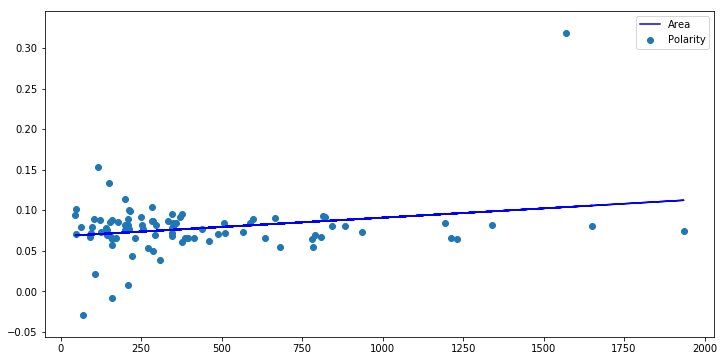

In [576]:
#plt.scatter(postcities['Area'],postcities['Polarity'])
plt.figure(figsize = (12,6))
plt.scatter(postcities['Area'], postcities['Polarity'])
#plt.ylim(0, 1)
#plt.xlim(3.5,4.5)


f = lambda x: 2.292e-05*x + 0.0681
# x values of line to plot
x = postcities['Area']
# plot fit
plt.plot(x,f(x), c="blue")

#better take min and max of x values
#
plt.legend()
plt.show()

In [577]:
postcities[postcities['Polarity'] > 0.3]

,CityName,Pop2017,Pop2010,NumComments,Votes,Area,Density,Lat,Long,Income,Polarity,Subjectivity
59,Oklahoma City,1383737.0,1252987.0,1.625,12.625,1570.3,407.0,35.4671,97.5137,19366.0,0.318807,0.335606
